In [2]:
import pandas as pd

star_df = pd.read_csv('star_classification.csv')


In [3]:
star_df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [4]:
star_df[['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'redshift']].corr()

,alpha,delta,u,g,r,i,z,redshift
alpha,1.000000,0.138691,-0.001532,-0.002423,-0.022083,-0.023580,-0.002918,0.001667
delta,0.138691,1.000000,0.002074,0.003523,-0.006835,-0.004480,0.003630,0.031638
u,-0.001532,0.002074,1.000000,0.999311,0.054149,0.045730,0.998093,0.014309
g,-0.002423,0.003523,0.999311,1.000000,0.062387,0.056271,0.999161,0.022954
r,-0.022083,-0.006835,0.054149,0.062387,1.000000,0.962868,0.053677,0.433241
i,-0.023580,-0.004480,0.045730,0.056271,0.962868,1.000000,0.055994,0.492383
z,-0.002918,0.003630,0.998093,0.999161,0.053677,0.055994,1.000000,0.030380
redshift,0.001667,0.031638,0.014309,0.022954,0.433241,0.492383,0.030380,1.000000


In [5]:
X_star = star_df[['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'redshift']]

y_star = star_df['class']

# Random Forest Classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# split the data into 75% training and 25% testing
X_star_train, X_star_test, y_star_train, y_star_test = train_test_split(X_star, y_star, test_size=0.25)

# standardize training and test
scaler = StandardScaler()

scaler.fit(X_star_train)

X_star_train = scaler.transform(X_star_train)
X_star_test = scaler.transform(X_star_test)

# train rfr model on training set 
rf_clf = RandomForestClassifier()
rf_clf.fit(X_star_train, y_star_train)

RandomForestClassifier()

In [ ]:
# test model on test and training set
y_star_pred_test = rf_clf.predict(X_star_test)
y_star_pred_train = rf_clf.predict(X_star_train)

In [24]:
len(X_star_train)

75000

In [25]:
len(X_star_test)

25000

In [7]:
from sklearn.metrics import accuracy_score

# accuracy and error on testing set
accuracy = accuracy_score(y_star_test, y_star_pred_test)
error = 1 - accuracy
print(f"Accuracy: {accuracy:.4f}")
print(f"Error: {error:.4f}")

Accuracy: 0.9778
Error: 0.0222


In [8]:
from sklearn.metrics import accuracy_score

# accuracy and error on training set
accuracy = accuracy_score(y_star_train, y_star_pred_train)
error = 1 - accuracy
print(f"Accuracy: {accuracy:.4f}")
print(f"Error: {error:.4f}")

Accuracy: 1.0000
Error: 0.0000


# Decision Tree Classifier

In [9]:
from sklearn.tree import DecisionTreeClassifier

# train decision tree model on training set 
dec_tree_clf = DecisionTreeClassifier()
dec_tree_clf.fit(X_star_train, y_star_train)

# test model on test and training set
y_star_pred_test = dec_tree_clf.predict(X_star_test)
y_star_pred_train = dec_tree_clf.predict(X_star_train)

In [10]:
from sklearn.metrics import accuracy_score

# accuracy and error on testing set
accuracy = accuracy_score(y_star_test, y_star_pred_test)
error = 1 - accuracy
print(f"Accuracy: {accuracy:.4f}")
print(f"Error: {error:.4f}")

Accuracy: 0.9653
Error: 0.0347


In [11]:
from sklearn.metrics import accuracy_score

# accuracy and error on training set
accuracy = accuracy_score(y_star_train, y_star_pred_train)
error = 1 - accuracy
print(f"Accuracy: {accuracy:.4f}")
print(f"Error: {error:.4f}")

Accuracy: 1.0000
Error: 0.0000


In [13]:
X_star.columns


Index(['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'redshift'], dtype='object')

In [14]:
str(dec_tree_clf.classes_[0])

'GALAXY'

In [15]:
str(dec_tree_clf.classes_[1])

'QSO'

In [17]:
from sklearn.tree import DecisionTreeClassifier

# train decision tree model on training set 
dec_tree_clf = DecisionTreeClassifier(max_depth=3)
dec_tree_clf.fit(X_star_train, y_star_train)

# test model on test and training set
y_star_pred_test = dec_tree_clf.predict(X_star_test)
y_star_pred_train = dec_tree_clf.predict(X_star_train)

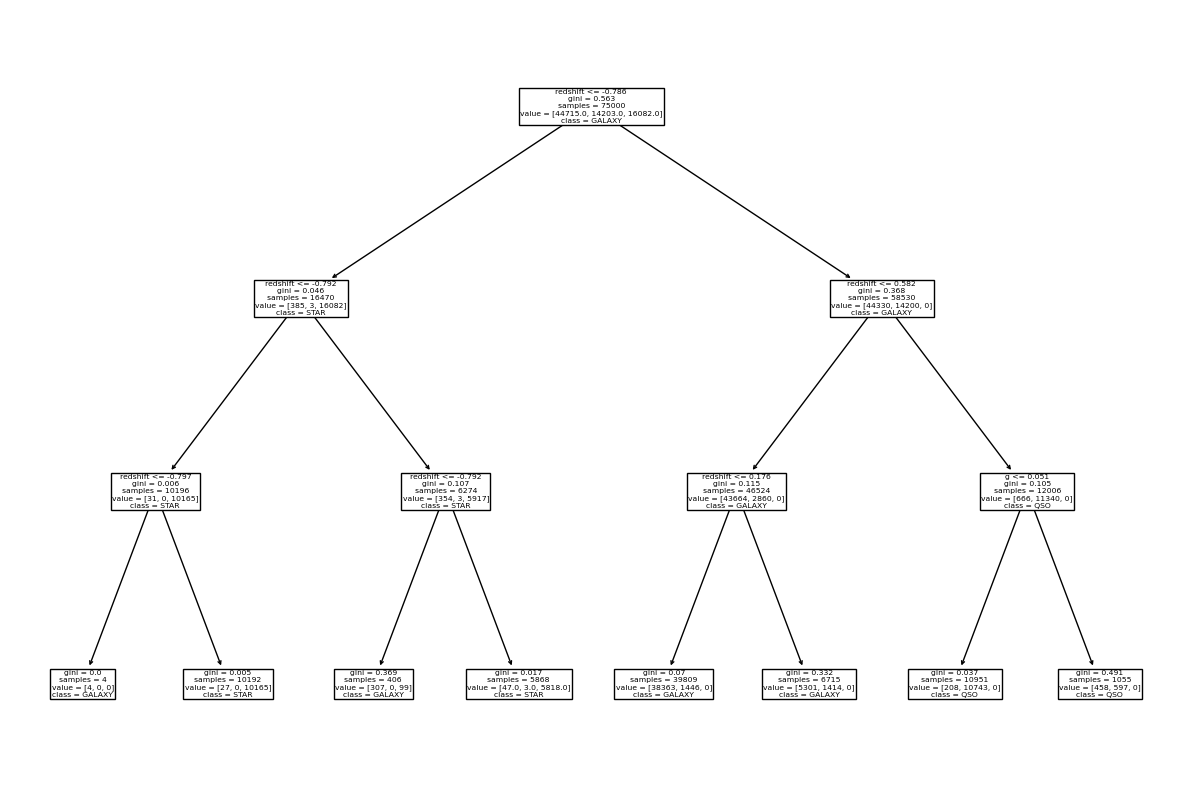

In [23]:
from sklearn.tree import plot_tree
from sklearn import tree
from matplotlib import pyplot as plt
                    
# train decision tree classifier model on training set with optimal max_depth (10)

plt.figure()
plt.gcf().set_size_inches(15, 10)


# 'plot' decision tree
tree.plot_tree(dec_tree_clf, feature_names=X_star.columns, class_names=[str(dec_tree_clf.classes_[0]),str(dec_tree_clf.classes_[1]), str(dec_tree_clf.classes_[2])]);
